In [51]:
import matplotlib.pyplot as plt

def plot_point_sequence(points):
    """
    Plot a sequence of points.

    Parameters:
    - points: A list of 2D points (x, y).
    """
    x_values, y_values = zip(*points)  # Unzip the points into separate x and y values.
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed.
    plt.plot(x_values, y_values, marker='o', linestyle='-')
    plt.title("Point Sequence")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

def plot_point_sequence_with_arrows(points):
    """
    Plot a sequence of points with arrows to indicate the direction.

    Parameters:
    - points: A list of 2D points (x, y).
    """
    x_values, y_values = zip(*points)  # Unzip the points into separate x and y values.

    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed.

    for i in range(len(points) - 1):
        x1, y1 = points[i]
        x2, y2 = points[i + 1]

        plt.plot([x1, x2], [y1, y2], marker='o', linestyle='-')
        dx = x2 - x1
        dy = y2 - y1
        plt.arrow(x1, y1, dx, dy, head_width=0.02, head_length=0.02, fc='blue', ec='blue')

    plt.title("Point Sequence with Arrows")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

# plot_point_sequence(point_sequence)

Returning on iteration 1 with expected decrease: -6.930910349847267e-10
Number of iterations for every point: [4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


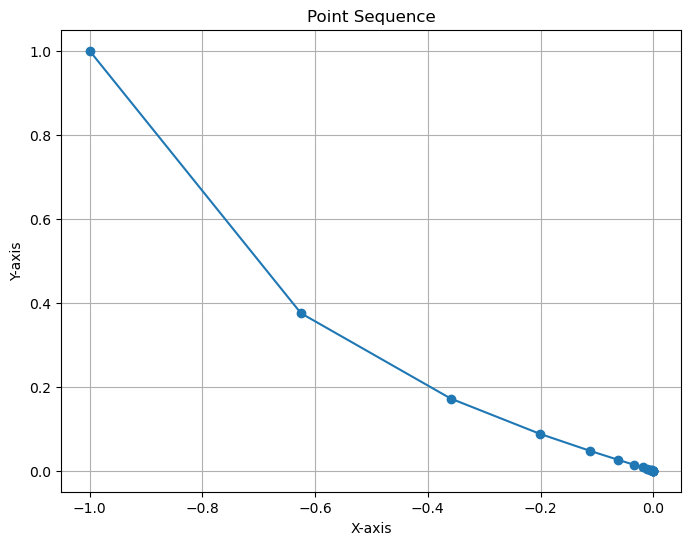

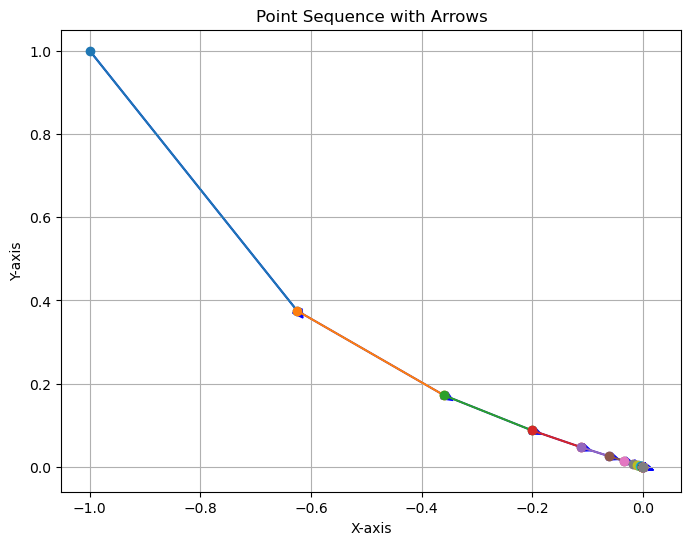

In [52]:
import numpy as np

def f(x):
    return 2 * x[0]**2 + x[0]*x[1] + 3 * x[1]**2

def grad_f(x):
    return np.array([4*x[0] + x[1], 6*x[1] + x[0]])

def armijo_rule(f, gradient, x, alpha=1.0, sigma=0.5, epsilon=1e-9):
    """
    Armijo rule for step size selection in line search.

    Parameters:
    - f: Objective function to be minimized.
    - gradient: Gradient of the objective function.
    - x: Current point.
    - alpha: Initial step size.
    - sigma: Contraction factor (0 < sigma < 1).
    - epsilon: Minimal change for stop condition.

    Returns:
    - step_size: Chosen step size.
    """

    # Initialize step size.
    step_size = alpha
    
    xs = [x]
    iterations = []
    iteration = 0

    while True:
        # starting new iteration
        iteration += 1
        
        # Calculate the potential new point.
        d = -gradient(x)
        # d = d / np.linalg.norm(d)
        x_new = x + step_size * d

        # Compute the function value at the new point.
        f_new = f(x_new)

        # Compute the Armijo condition.
        expected_decrease = sigma * step_size * gradient(x) @ d
        
        if np.abs(expected_decrease) < epsilon:
            print(f"Returning on iteration {iteration} with expected decrease: {expected_decrease}")
            return xs, iterations

        if f_new <= f(x) + expected_decrease:
            # Armijo condition is satisfied.
            x = x_new
            xs.append(x)
            iterations.append(iteration)
            iteration = 0
        else:
            # Reduce step size and continue the search.
            step_size *= sigma

            
result = armijo_rule(f, grad_f, np.array((-1, 1)))
print(f"Number of iterations for every point: {result[1]}")
plot_point_sequence(result[0])
plot_point_sequence_with_arrows(result[0])

Newton method finished after 5 iterations.
Newton method final point, function value and iterations: (array([0.0000000e+00, 4.0828782e-11]), 1.0, 5)


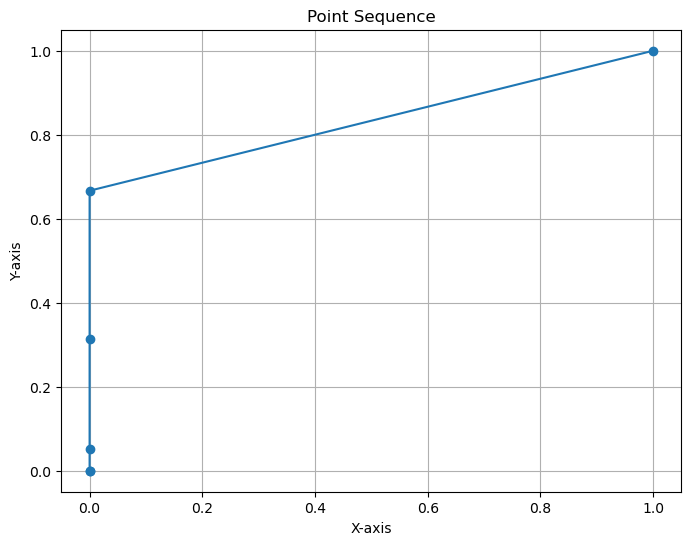

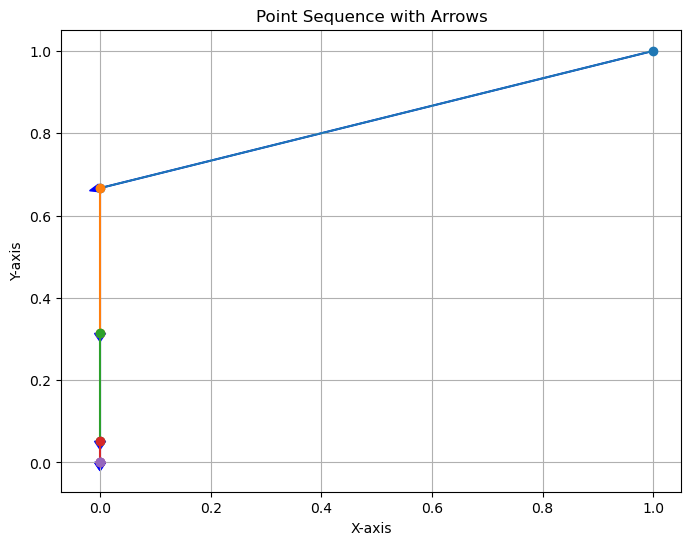

In [53]:
import numpy as np
from scipy.optimize import line_search

def f(x):
    return x[0]**2 + np.exp(x[1]**2)

def grad_f(x):
    return np.array([2*x[0], 2*x[1]*np.exp(x[1]**2)])

def hess_f(x):
    return np.array([[2, 0],
        [0, 2*np.exp(x[1]**2) + 4*x[1]**2*np.exp(x[1]**2)]])

def newton_method(f, grad_f, hess_f, x0, tol=1e-6, max_iter=100):
    """
    Unconstrained optimization using the Newton's method.

    Parameters:
    - f: Objective function to be minimized.
    - grad_f: Gradient of the objective function.
    - hess_f: Hessian matrix of the objective function.
    - x0: Initial guess.
    - tol: Tolerance for stopping criteria.
    - max_iter: Maximum number of iterations.

    Returns:
    - x_opt: Optimal solution.
    - f_opt: Optimal function value.
    - num_iters: Number of iterations performed.
    """
    x = x0
    num_iters = 0
    xs = [x]

    while num_iters < max_iter:
        grad = grad_f(x)
        hess = hess_f(x)

        if np.linalg.norm(grad) < tol:
            break

        p = -np.linalg.solve(hess, grad)  # Compute the Newton step

        # Perform a line search to find the optimal step size alpha
        # alpha = line_search(f, grad_f, x, p, c1=1e-4)
        # alpha = line_search(f, grad_f, x, p)[0]
        # x = x + alpha * p
        
        x = x + p
        xs.append(x)
        num_iters += 1

    print(f"Newton method finished after {num_iters} iterations.")
    f_opt = f(x)
    return xs, (x, f_opt, num_iters)


result = newton_method(f, grad_f, hess_f, np.array((1, 1)))
print(f"Newton method final point, function value and iterations: {result[1]}")
plot_point_sequence(result[0])
plot_point_sequence_with_arrows(result[0])

/home/mikhail/Garage/anaconda/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Newton method final point, function value and iterations: (array([ 4.5999132e-05, -1.1499783e-05]), 2.3804101649498793e-09, 9)


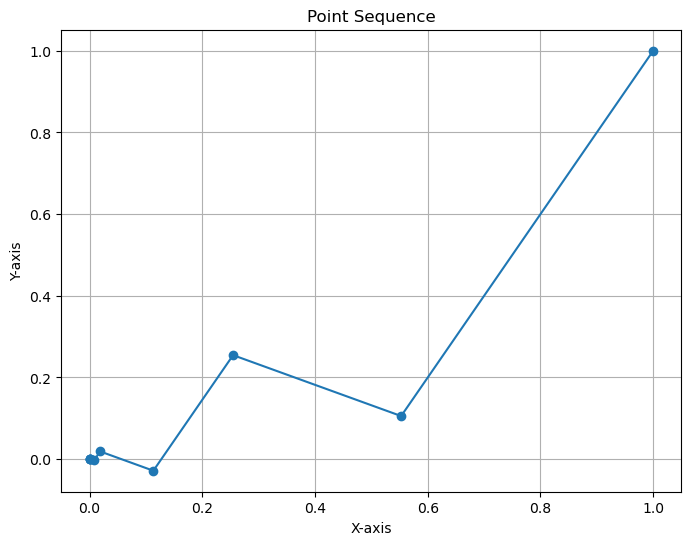

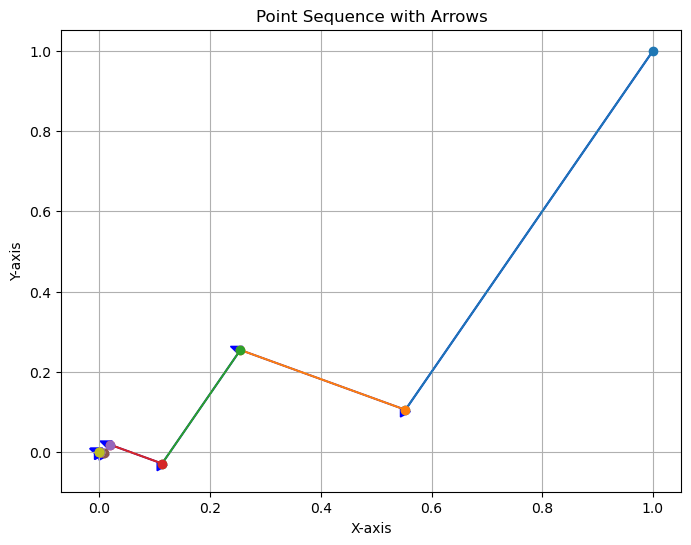

[array([1., 1.]), array([0.5527864 , 0.10557281]), array([0.25464401, 0.25464401]), array([ 0.11317511, -0.02829378]), array([0.01886252, 0.01886252]), array([ 0.00838334, -0.00209584]), array([0.00139722, 0.00139722]), array([ 0.00062099, -0.00015525]), array([0.0001035, 0.0001035]), array([ 4.5999132e-05, -1.1499783e-05])]


In [54]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    return x[0]**2 + 2 * x[1]**2

def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

def conjugate_gradient(f, grad_f, x0, tol=1e-6, max_iter=100):
    """
    Unconstrained optimization using the Conjugate Gradient method.

    Parameters:
    - f: Objective function to be minimized.
    - grad_f: Gradient of the objective function.
    - x0: Initial guess.
    - tol: Tolerance for stopping criteria.
    - max_iter: Maximum number of iterations.

    Returns:
    - x_opt: Optimal solution.
    - f_opt: Optimal function value.
    - num_iters: Number of iterations performed.
    """
    x = x0
    xs = [x]
    num_iters = 0

    # Initialize the search direction and the gradient at the initial point.
    d = -grad_f(x)
    d /= np.linalg.norm(d)
    new_d = d  # Conjugate direction at the beginning

    while num_iters < max_iter:
        # adjust step size
        # alpha = np.dot(d, d) / np.dot(d, grad_f(x))
        # res = minimize(f, x, method='SLSQP', options={'direction': new_d})
        # res = minimize(f, x, options={'direction': new_d})
        # alpha = res.x[0]
        alpha = line_search(f, grad_f, x, new_d)[0]
        if not alpha:
            break
        x = x + alpha * new_d
        xs.append(x.copy())
        
        d = new_d

        if np.linalg.norm(grad_f(x)) < tol:
            break
            
        # Compute the new gradient and the new conjugate direction.
        new_d = -grad_f(x)
        new_d /= np.linalg.norm(new_d)
        # new_d -= d.T * new_d / np.norm(d) * d
        new_d -= d.T @ new_d * d
        new_d /= np.linalg.norm(new_d)
        # beta = np.dot(grad_new, grad_new) / np.dot(g, g)
        # d = -grad_new + beta * d
        
        num_iters += 1

    f_opt = f(x)
    return xs, (x, f_opt, num_iters)

# Example usage:
# Define your objective function, gradient, initial guess, and other parameters.
# Then call conjugate_gradient to find the optimal solution.
result = conjugate_gradient(f, grad_f, np.array((1., 1.)), max_iter=10)
print(f"Newton method final point, function value and iterations: {result[1]}")
plot_point_sequence(result[0])
plot_point_sequence_with_arrows(result[0])
print(result[0])